### **1. Personal Information**

**Name:** Xander Akiko Snelder

**StudentID:** 11598727

**Email:** [xander.snelder2@student.uva.nl](xander.snelder2@student.uva.nl)

**Submitted on:** 22-04-2024

**Github:** https://github.com/XanderSnelder/master-thesis

### **2. Data Context**

#### **2.1. SimLex-999**

The SimLex-999 is a gold standard dataset which can be used to evaluate the performance of Large Language Models (LLMs), particularly,  in how well they capture the semantic relationships between words. This dataset, created through a research paper in 2015, is specifically focused on the semantic similarities between word pairs. The authors differentiates between similarity and relatedness of words, emphasizing that these concepts are not mutually exclusive or independent. Semantic similarity refers to how much two concepts share common features or belong to the same category. Meanwhile, semantic relatedness encompasses a broader range of associations between concepts, including aspects like how frequently the concepts interact or co-occur in real-world contexts, not limited to shared attributes or categories. The SimLex-999 is developed with the help of 500 native English speakers from the United States and contains 999 word pairs, where each pair has been rated for similarity by approximately 50 annotators. Notably, the annotation process was conducted through the crowdsourcing marketplace Amazon Mechanical Turk (MTurk).

https://doi.org/10.48550/arXiv.1408.3456

#### **2.2. Dutch Variation of SimLex-999**

Based on the success and utility of the SimLex-999 dataset, many variations have been developed across various languages. Each of these variants addresses different aspects of semantic similarity or relatedness and broadens the applicability of the original SimLex-999. The Dutch version of the SimLex-999 has been created in 2024 and still in anonymous review (not published yet). This dataset is developed with the assistance of 235 native Dutch speakers. The English words of the original SimLex-999 were translated into Dutch, ensuring they matched the original lexemes and semantics. The German SimLex-999 was referenced for guidance due to the linguistic similarities between Dutch and German. Furthermore, each word pair was rated by 15 annotators on a scale from 0 to 10, and the averages were used as final scores.

#### **2.3. Description of Columns**

##### **2.3.1. English SimLex-999**

The English SimLex-999 dataset contains the following columns:

* **word1:** The first word in the pair.

* **word2:** The second word in the pair.

* **POS:** This indicates the Part-Of-Speech (POS) for both words in the pair, where 'N' stands for nouns, 'V' for verbs, and 'A' for adjectives.

* **SimLex999:** This is the core of the dataset and contains the similarity scores of the word pairs. It represents how similar the two words are in meaning, as judged by human annotators. The score ranges from 0 (no similarity) to 10 (high similarity).

* **conc(w1):** This contains a measure of the conceptual concreteness of the first word. This score ranges 1 (highly abstract) to 5 (highly concrete). Concreteness ratings indicate how tangible or concrete a word is, as opposed to abstract.

* **conc(w2):** Similar to conc(w1), this column provides the concreteness rating for the second word in the pair.

* **concQ:** This is the concreteness of the word pairs categorized into quartiles (1-4).

* **Assoc(USF):** This contains association/relatedness scores from the University of South Florida (USF) Free Association Norms.

* **SimAssoc333:** This is a binary indicator used for a subset of the 333 most associated word pairs in SimLex-999, according to USF Association Norms.

* **SD(SimLex):** Standard Deviation of the SimLex similarity ratings. This column shows how much variance there was in the human similarity judgements for each word pair."

https://fh295.github.io//simlex.html

##### **2.3.2. Dutch SimLex-999**

The description of columns for the Dutch SimLex-999 are similar, however, this dataset only contains the columns: 'word1', word2', 'POS', and 'SimLex999'.

### **3. Data Description and Analysis**

Both datasets are relatively small, straightforward, and do not contain any missing values. Therefore, there was no need for extensive data cleaning, processing, or analysis.

#### **3.1. Set-up**

In [702]:
# Import libraries and utils
%run '../eda/utils.ipynb'

In [703]:
# Load data
eng_simlex = pd.read_csv("../data/eng-simlex-999.txt", delimiter='\t')
nl_simlex = pd.read_csv("../data/nl-simlex-999.txt", delimiter='\t')

In [704]:
# Rename columns for enhanced clarity
eng_simlex = eng_simlex.rename(columns={'SimLex999': 'similarity_score'})
eng_simlex = eng_simlex.rename(columns={'SD(SimLex)': 'standard_deviation'})
nl_simlex = nl_simlex.rename(columns={'SimLex999': 'similarity_score'})

#### **3.2. Initial Overview**
This section delves into the fundamental characteristics and structure of the dataset. It starts with an overarching summary that provides a comprehensive view of the data, followed by a examination of individual elements within the summary.

##### **3.2.1. Dutch SimLex-999**

In [705]:
# Summary of basic information
nl_simlex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   word1             999 non-null    object 
 1   word2             999 non-null    object 
 2   similarity_score  999 non-null    float64
 3   POS               999 non-null    object 
dtypes: float64(1), object(3)
memory usage: 31.3+ KB


In [706]:
# First 5 rows
nl_simlex.head()

,word1,word2,similarity_score,POS
0,oud,nieuw,1.94,A
1,slim,intelligent,8.19,A
2,hard,moeilijk,4.46,A
3,gelukkig,vrolijk,6.49,A
4,hard,stoer,5.69,A


In [707]:
# Last 5 rows
nl_simlex.tail()

,word1,word2,similarity_score,POS
994,samenvoegen,verwerven,3.89,V
995,sturen,bijwonen,1.85,V
996,verzamelen,bijwonen,1.06,V
997,opnemen,intrekken,2.29,V
998,bijwonen,aankomen,1.32,V


In [708]:
# Count of rows
nl_simlex.count()

word1               999
word2               999
similarity_score    999
POS                 999
dtype: int64

In [709]:
# Data types
nl_simlex.dtypes

word1                object
word2                object
similarity_score    float64
POS                  object
dtype: object

In [710]:
# Check for missing values in each columns
nl_simlex.isnull().sum()

word1               0
word2               0
similarity_score    0
POS                 0
dtype: int64

In [711]:
# Counts of values in categorical column 'POS'
nl_simlex['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

##### **3.2.2. English SimLex-999**

In [712]:
# Summary of basic information
eng_simlex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   word1               999 non-null    object 
 1   word2               999 non-null    object 
 2   POS                 999 non-null    object 
 3   similarity_score    999 non-null    float64
 4   conc(w1)            999 non-null    float64
 5   conc(w2)            999 non-null    float64
 6   concQ               999 non-null    int64  
 7   Assoc(USF)          999 non-null    float64
 8   SimAssoc333         999 non-null    int64  
 9   standard_deviation  999 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


In [713]:
# First 5 rows
eng_simlex.head()

,word1,word2,POS,similarity_score,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,standard_deviation
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19
3,happy,cheerful,A,9.55,2.56,2.34,1,5.85,1,2.18
4,hard,easy,A,0.95,3.76,2.07,2,5.82,1,0.93


In [714]:
# Last 5 rows
eng_simlex.tail()

,word1,word2,POS,similarity_score,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,standard_deviation
994,join,acquire,V,2.85,2.86,2.93,2,0.0,0,0.99
995,send,attend,V,1.67,2.70,3.17,2,0.0,0,1.44
996,gather,attend,V,4.80,2.75,3.17,2,0.0,0,1.97
997,absorb,withdraw,V,2.97,3.11,3.04,2,0.0,0,1.75
998,attend,arrive,V,6.08,3.17,3.22,2,0.0,0,1.18


In [715]:
# Count of rows
eng_simlex.count()

word1                 999
word2                 999
POS                   999
similarity_score      999
conc(w1)              999
conc(w2)              999
concQ                 999
Assoc(USF)            999
SimAssoc333           999
standard_deviation    999
dtype: int64

In [716]:
# Data types
eng_simlex.dtypes

word1                  object
word2                  object
POS                    object
similarity_score      float64
conc(w1)              float64
conc(w2)              float64
concQ                   int64
Assoc(USF)            float64
SimAssoc333             int64
standard_deviation    float64
dtype: object

In [717]:
# Check for missing values in each columns
eng_simlex.isnull().sum()

word1                 0
word2                 0
POS                   0
similarity_score      0
conc(w1)              0
conc(w2)              0
concQ                 0
Assoc(USF)            0
SimAssoc333           0
standard_deviation    0
dtype: int64

In [718]:
# Count of values in categorical column 'POS'
eng_simlex['POS'].value_counts()

N    666
V    222
A    111
Name: POS, dtype: int64

##### **3.2.3. Interpretation of Results**

Both datasets contain 999 rows without any missing values. Moreover, the counts of 'Nouns', 'Verbs', and 'Adjectives' are similarly distributed: 666 Nouns, 222 Verbs, and 111 Adjectives. A major difference is that the English SimLex-999 includes additional columns, such as conceptual concreteness and association/relatedness scores. Considering this inconsistency between the datasets, and since this research is particularly focused on similarity scores between word pairs, this exploratory data analysis will primarily focus on these similarity scores.

#### **3.3. Descriptive Statistics**

This section explores the basic summary statistics such as the central tendencies, standard deviation, and min/max values.

##### **3.3.1. Dutch SimLex-999**

In [719]:
# Summary statistics of the similarity score
round(nl_simlex['similarity_score'].describe(), 2)

count    999.00
mean       3.65
std        2.00
min        0.49
25%        2.00
50%        3.27
75%        5.08
max        9.28
Name: similarity_score, dtype: float64

In [720]:
# Mean vs Median of numerical columns
print_mean_median(nl_simlex)

similarity_score - Mean: 3.65, Median: 3.27


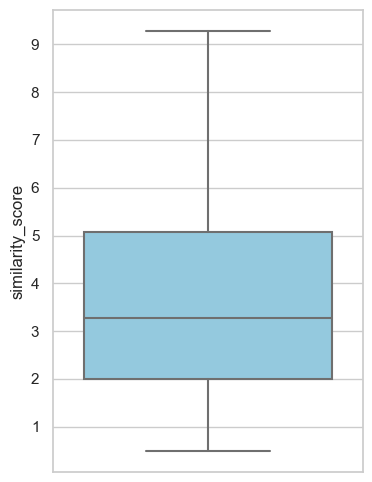

In [721]:
plot_boxplot(nl_simlex, 'similarity_score')

##### **3.3.2 English SimLex-999**

In [722]:
# Summary statistics of the similarity score
round(eng_simlex['similarity_score'].describe(), 2)

count    999.00
mean       4.56
std        2.61
min        0.23
25%        2.38
50%        4.67
75%        6.75
max        9.80
Name: similarity_score, dtype: float64

In [723]:
# Summary statistics of the standard deviation
round(eng_simlex['standard_deviation'].describe(), 2)

count    999.00
mean       1.27
std        0.37
min        0.34
25%        1.08
50%        1.31
75%        1.54
max        2.18
Name: standard_deviation, dtype: float64

In [724]:
# Summary statistics of the conc(w1)
round(eng_simlex['conc(w1)'].describe(), 2)

count    999.00
mean       3.66
std        1.13
min        1.19
25%        2.62
50%        3.83
75%        4.79
max        5.00
Name: conc(w1), dtype: float64

In [725]:
# Summary statistics of the conc(w2)
round(eng_simlex['conc(w2)'].describe(), 2)

count    999.00
mean       3.57
std        1.16
min        1.19
25%        2.50
50%        3.66
75%        4.75
max        5.00
Name: conc(w2), dtype: float64

In [726]:
# Summary statistics of the Assoc(USF)
round(eng_simlex['Assoc(USF)'].describe(), 2)

count    999.00
mean       0.75
std        1.34
min        0.00
25%        0.14
50%        0.25
75%        0.68
max        8.85
Name: Assoc(USF), dtype: float64

In [727]:
# Mean vs Median of numerical columns
print_mean_median(eng_simlex)

similarity_score - Mean: 4.56, Median: 4.67
conc(w1) - Mean: 3.66, Median: 3.83
conc(w2) - Mean: 3.57, Median: 3.66
concQ - Mean: 2.5, Median: 3.0
Assoc(USF) - Mean: 0.75, Median: 0.25
SimAssoc333 - Mean: 0.33, Median: 0.0
standard_deviation - Mean: 1.27, Median: 1.31


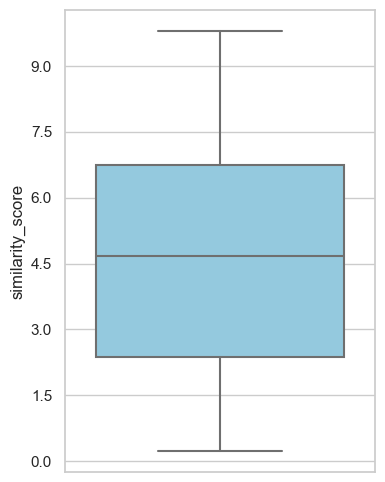

In [728]:
# Plot boxplot of similarity score
plot_boxplot(eng_simlex, 'similarity_score')

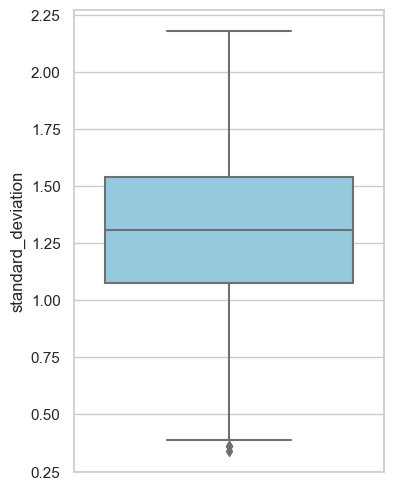

In [729]:
# Plot boxplot of standard deviation
plot_boxplot(eng_simlex, 'standard_deviation')

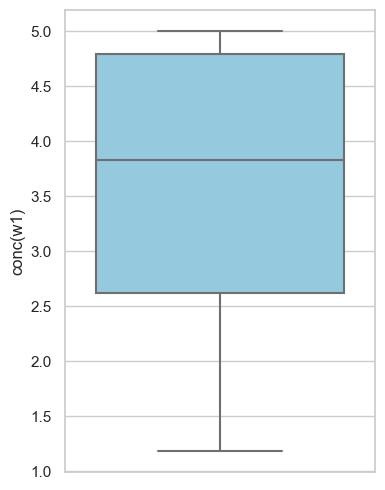

In [730]:
# Plot boxplot of conc(w1)
plot_boxplot(eng_simlex, 'conc(w1)')

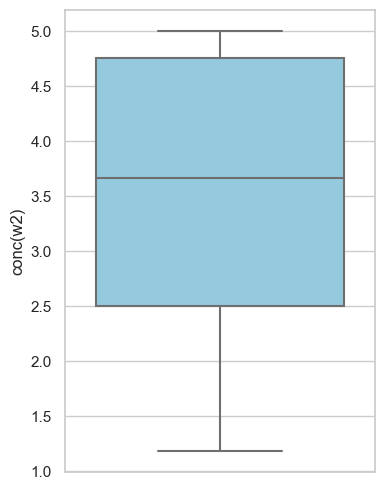

In [731]:
# Plot boxplot of conc(w2)
plot_boxplot(eng_simlex, 'conc(w2)')

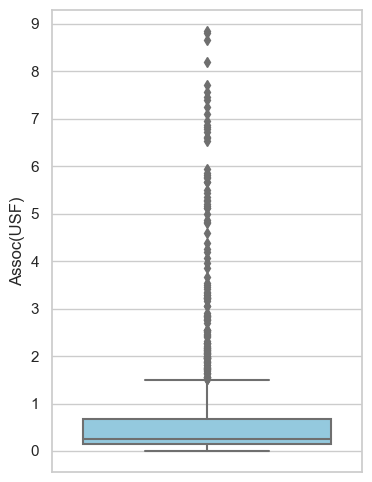

In [732]:
# Plot boxplot of Assoc(USF)
plot_boxplot(eng_simlex, 'Assoc(USF)')

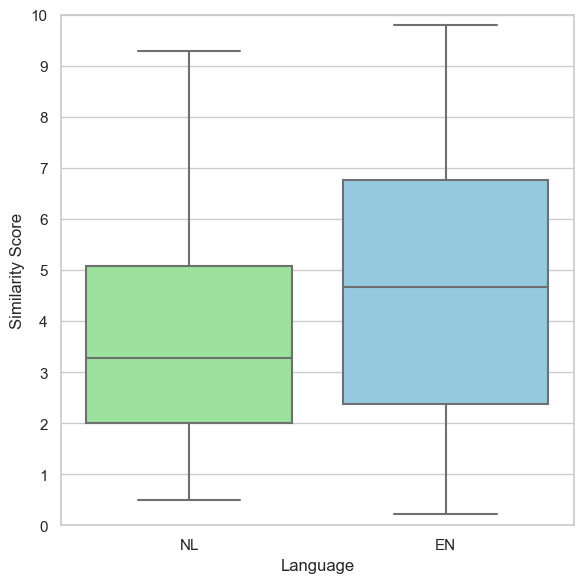

In [779]:
# Add a new column to each DataFrame to indicate the language
nl_simlex['Language'] = 'NL'
eng_simlex['Language'] = 'EN'

# Combine the two DataFrames
combined_data = pd.concat([nl_simlex, eng_simlex])

# Creating the boxplot with specified colors
plt.figure(figsize=(6, 6))
sns.boxplot(x='Language', y='similarity_score', data=combined_data, palette=['lightgreen', 'skyblue',])

# Setting labels and title
plt.ylabel('Similarity Score')
# plt.title('Comparison of SimLex-999 Similarity Scores')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Adjust layout for a clean fit
plt.tight_layout()

# Show the plot
plt.show()

##### **3.3.3. Interpretation of Results**

Both the mean and median of the similarity scores are about 1 point higher for the English version (4.56 and 4.67, respectively) compared to the Dutch version (3.65 and 3.27). The Interquartile Range (IQR)[[1]](#Footnote1) of the English dataset is slightly larger than that of the Dutch version. Considering the facts that the word pairs were translated from Dutch to English, both datasets contain the same number of rows, and the similarity scores in both datasets range from 1 to 10, we can conclude there are some notable differences. The statistics indicate that the word pairs in the English SimLex-999 are perceived as relatively more similar. Additionally, the English version also demonstrates higher variability in the middle 50% of the data. This means the data is less centered around the median and more spread out, suggesting that there are more diverse values within its central half. For the English SimLex-999, the summary statistics and the boxplots of 'conc(w1)' and 'conc(w2)' show a close resemblance. Furthermore, there are many outliers found in the 'Assoc(USF)' column, which will be explored later on.

[<a name="Footnote1">1</a>]: The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of a data set, representing the range of the middle 50% of the data. It is a measure of variability that helps to identify outliers by establishing boundaries.

#### **3.4. Distribution and Variability**

This sections gains insights into the distribution of the numerical data.

##### **3.4.1. Dutch SimLex-999**

In [734]:
# Variance of numerical columns
print_variance(nl_simlex)

similarity_score - Variance: 3.99


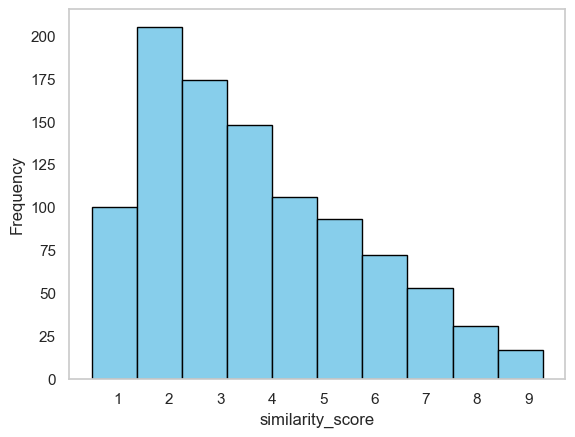

In [735]:
plot_histogram(nl_simlex, 'similarity_score')

##### **3.4.2. English SimLex-999**

In [736]:
# Variance of numerical columns
print_variance(eng_simlex)

similarity_score - Variance: 6.84
conc(w1) - Variance: 1.28
conc(w2) - Variance: 1.34
concQ - Variance: 1.25
Assoc(USF) - Variance: 1.81
SimAssoc333 - Variance: 0.22
standard_deviation - Variance: 0.13


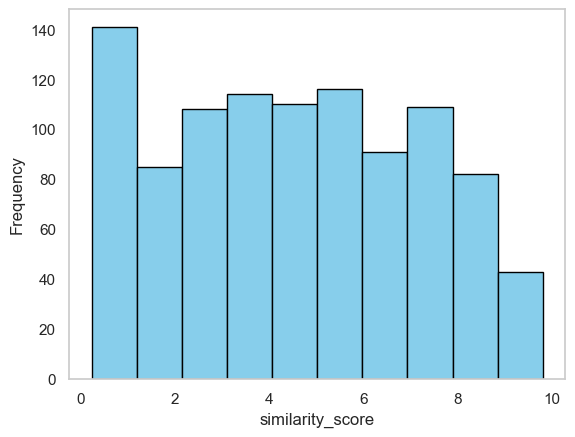

In [737]:
plot_histogram(eng_simlex, 'similarity_score')

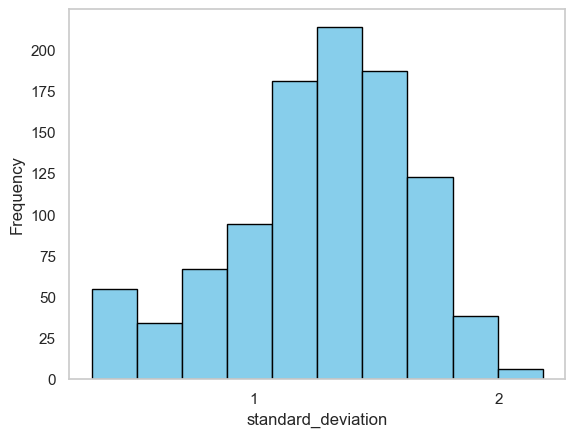

In [738]:
plot_histogram(eng_simlex, 'standard_deviation')

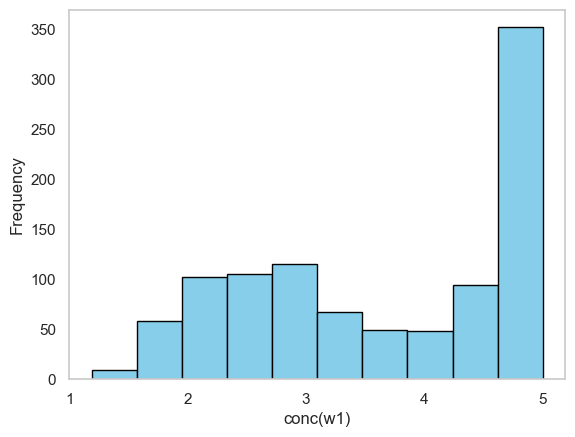

In [739]:
plot_histogram(eng_simlex, 'conc(w1)')

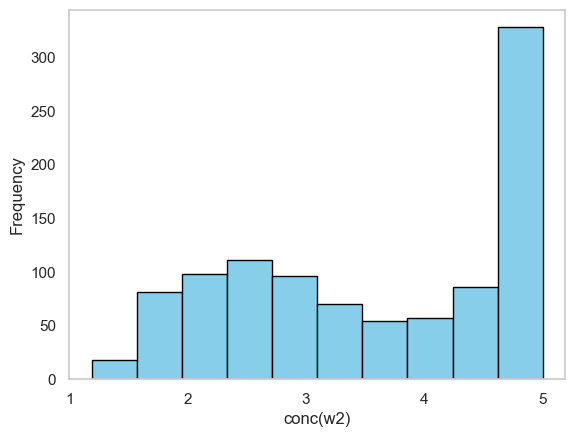

In [740]:
plot_histogram(eng_simlex, 'conc(w2)')

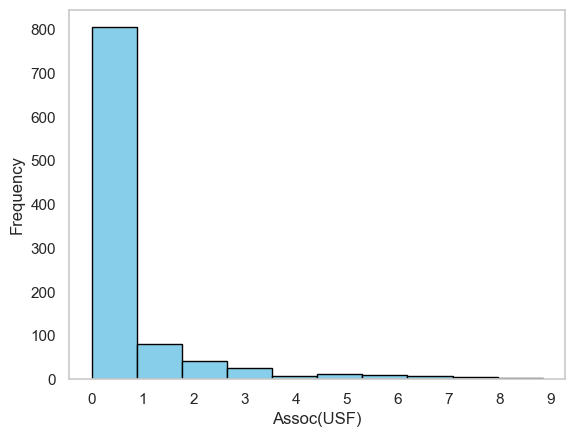

In [741]:
plot_histogram(eng_simlex, 'Assoc(USF)')

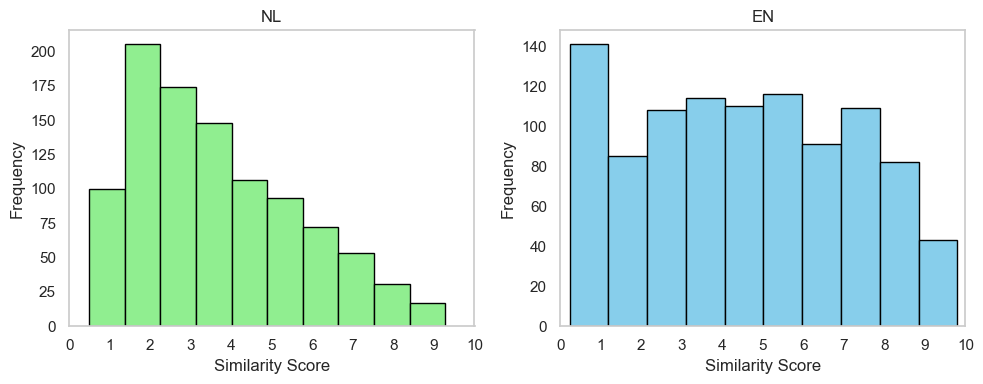

In [780]:
# Creating a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Defining the x-axis limits
x_min = 0
x_max = 10

# Plotting the first histogram (Dutch)
axes[0].hist(nl_simlex['similarity_score'], bins=10, edgecolor='black', color='lightgreen')
axes[0].set_title('NL')
axes[0].set_xlabel('Similarity Score')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False)  # Turning off the grid

# Plotting the second histogram (English)
axes[1].hist(eng_simlex['similarity_score'], bins=10, edgecolor='black', color='skyblue')
axes[1].set_title('EN')
axes[1].set_xlabel('Similarity Score')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False)  # Turning off the grid

# Adjust layout for a clean fit
plt.tight_layout()

# Show the plot
plt.show()

##### **3.4.3. Interpretation of Results**

Diving deeper into the distribution of the similarity scores, the variance of the English dataset (6.84) is higher compared to the Dutch version (3.99). Additionally, the histogram shows that the frequency of Dutch similarity scores peaks around the value '2', with counts strongly decreasing after that. Meanwhile, the frequency distribution for the English version is more uniform, with the highest count at '1'. For the English SimLex-999, the distribution of 'conc(w1)' and 'conc(w2)' again look very similar. The histograms show a left-skewed distribution with the majority of values concentrated towards the higher end of the scale, particularly a spike at '5'. Furthermore, the 'Assoc(USF)' histogram presents a very different distribution with a strong right-skew, showing a large number of entries concentrated at the lower end of the scale, particularly at '0'.

#### **3.5. Detecting Outliers**

This sections aims to identify if there are any outliers in the numerical columns utilizing the IQR as method. Outliers are unusually distant from the central values of the data, indicating potential anomalies or special causes worth investigating. Any outlier in the similarity score might indicate that, for these specific words pairs, people's perceptions of their similarity vary more than usual. Any data points that fall outside of the following interval are considered outliers: $$\left[ Q1 - 1.5 \times IQR, \ Q3 + 1.5 \times IQR \right]$$

##### **3.5.1. Dutch SimLex-999**

In [743]:
print_outlier_counts(nl_simlex)

No outliers found in columns: similarity_score


##### **3.5.2. English SimLex-999**

In [744]:
print_outlier_counts(eng_simlex)

Outliers in Assoc(USF): 130
Outliers in standard_deviation: 3
No outliers found in columns: similarity_score, conc(w1), conc(w2), concQ, SimAssoc333


In [745]:
print_outlier_data(eng_simlex, 'Assoc(USF)')


Outliers in Assoc(USF):
       word1        word2 POS  similarity_score  conc(w1)  conc(w2)  concQ  \
0        old          new   A              1.58      2.72      2.81      2   
1      smart  intelligent   A              9.20      1.75      2.46      1   
2       hard    difficult   A              8.77      3.76      2.21      2   
3      happy     cheerful   A              9.55      2.56      2.34      1   
4       hard         easy   A              0.95      3.76      2.07      2   
..       ...          ...  ..               ...       ...       ...    ...   
786  protect       defend   V              9.13      2.86      2.31      1   
787     kill      destroy   V              5.90      3.90      3.08      2   
788   create         make   V              8.72      2.62      2.67      2   
789   accept       reject   V              0.83      3.03      2.40      2   
790   ignore        avoid   V              6.87      2.22      2.41      1   

     Assoc(USF)  SimAssoc333  standard

In [746]:
print_outlier_data(eng_simlex, 'standard_deviation')


Outliers in standard_deviation:
         word1      word2 POS  similarity_score  conc(w1)  conc(w2)  concQ  \
12        easy  difficult   A              0.58      2.07      2.21      1   
727       task      woman   N              0.68      2.84      4.46      2   
984  cooperate       join   V              5.18      1.87      2.86      1   

     Assoc(USF)  SimAssoc333  standard_deviation Language  
12         2.83            1                0.36       EN  
727        0.00            0                0.34       EN  
984        0.00            0                0.36       EN  


##### **3.5.3. Interpretation of Results**

The Dutch SimLex-999 does not contain any outliers according to the IQR method. In contrast, in the English version, 130 outliers are found in the 'Assoc(USF)' column and 3 in the 'standard_deviation' column. The outliers in the 'standard_deviation' column suggest that there was a particularly high level of disagreement or variability among the raters for these specific word pairs. This could indicate that the words pairs have multiple meanings, are used in various contexts, or their similarity is highly subjective and open to interpretation. The 'Assoc(USF)' column contains the association/relatedness scores from the University of South Florida (USF) Free Association Norms. Outliers in this column might indicate that these word pairs have an unusually high or low degree of association compared to most pairs in the dataset. Such outliers may reflect that some word pairs are usually seen as either very closely related or, on the other hand, not related at all.

#### **3.6. Distributions Across Variables**

This sections delves into distributions of several variables across POS.

##### **3.6.1. Dutch SimLex-999**

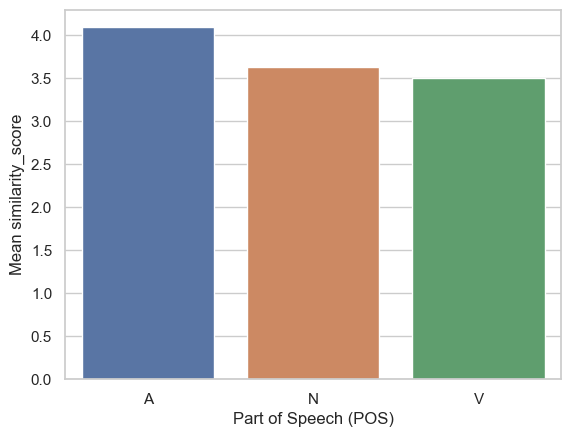

POS
A    4.09
N    3.63
V    3.50
Name: similarity_score, dtype: float64


In [747]:
# Plot the mean similarity score aggregated by POS
plot_feature_by_pos(nl_simlex, 'similarity_score')

# Calculate mean per POS
print_mean_per_pos(nl_simlex, 'similarity_score')

##### **3.6.2. English SimLex-999**

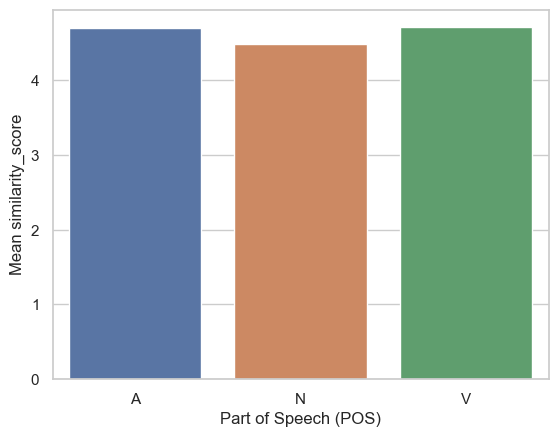

POS
A    4.70
N    4.49
V    4.71
Name: similarity_score, dtype: float64


In [748]:
# Plot the mean similarity score aggregated by POS
plot_feature_by_pos(eng_simlex, 'similarity_score')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'similarity_score')

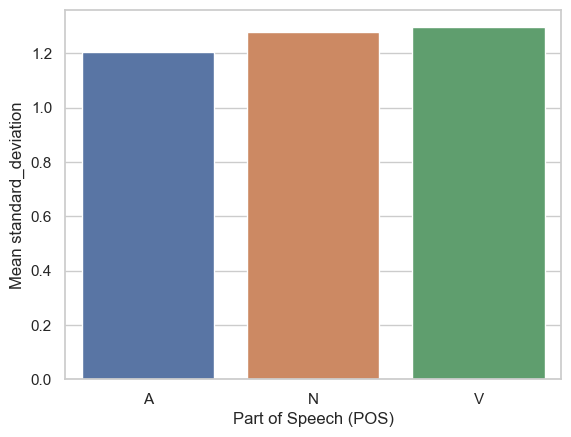

POS
A    1.21
N    1.28
V    1.30
Name: standard_deviation, dtype: float64


In [749]:
# Plot the mean standard deviation aggregated by POS
plot_feature_by_pos(eng_simlex, 'standard_deviation')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'standard_deviation')

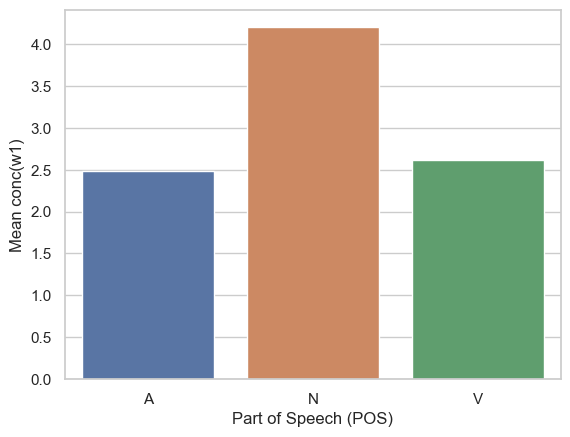

POS
A    2.49
N    4.20
V    2.62
Name: conc(w1), dtype: float64


In [750]:
# Plot the mean concreteness w1 aggregated by POS
plot_feature_by_pos(eng_simlex, 'conc(w1)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'conc(w1)')

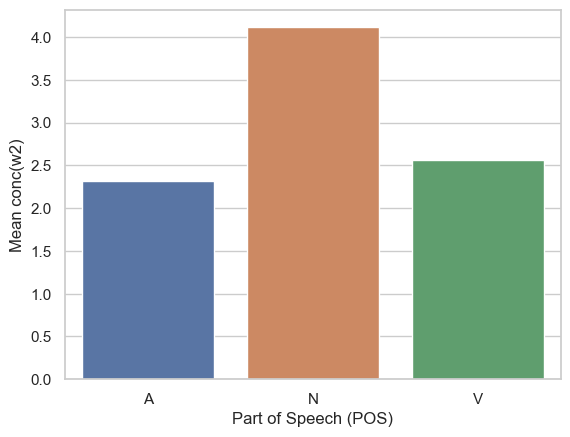

POS
A    2.31
N    4.11
V    2.56
Name: conc(w2), dtype: float64


In [751]:
# Plot the mean concreteness w2 aggregated by POS
plot_feature_by_pos(eng_simlex, 'conc(w2)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'conc(w2)')

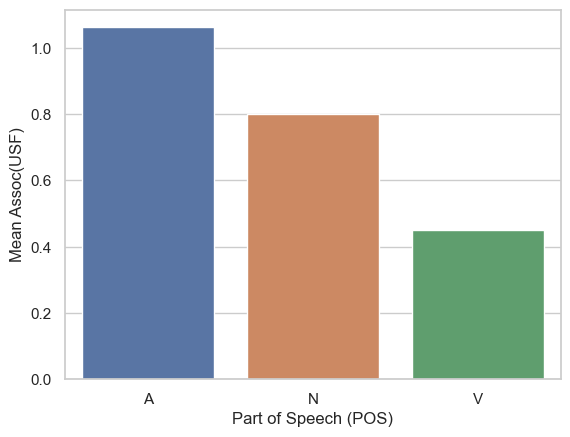

POS
A    1.06
N    0.80
V    0.45
Name: Assoc(USF), dtype: float64


In [752]:
# Plot the mean association scores aggregated by POS
plot_feature_by_pos(eng_simlex, 'Assoc(USF)')

# Calculate mean per POS
print_mean_per_pos(eng_simlex, 'Assoc(USF)')

##### **3.6.3. Interpretation of Results**

In both the English and Dutch datasets, the mean similarity scores and their standard deviations show minimal variation across different POS tags. The most significant variability in similarity scores, approximately 0.5, is observed between 'Adjectives' and 'Verbs' in the Dutch dataset. However, for the English dataset, it is observed that 'Nouns' are relatively more concrete. Lastly, 'Adjectives' exhibit association scores that are approximately twice as high as those for 'Verbs'.

#### **3.7. Correlations Across Variables**

This sections explores the correlations across several variables. Additionally, the p-values have been calculated to confirm if the correlation is statistically significant or due to random chance. The threshold for these p-value is set at 0.05. It starts with an overview of all correlations between variables, followed by a examination of individual elements within this overview.

**Note, this section only considers the English dataset**.

##### **3.7.1. Overview of All Correlations**

In [753]:
# Select subset of dataset
subset_eng_simlex = eng_simlex[['similarity_score', 'conc(w1)', 'conc(w2)', 'Assoc(USF)', 'standard_deviation']]

In [754]:
# Calculating correlation
correlation_matrix_eng_simlex = subset_eng_simlex.corr()

# Show results
correlation_matrix_eng_simlex

,similarity_score,conc(w1),conc(w2),Assoc(USF),standard_deviation
similarity_score,1.000000,-0.129236,-0.119966,0.188751,-0.054132
conc(w1),-0.129236,1.000000,0.805133,0.118817,0.028121
conc(w2),-0.119966,0.805133,1.000000,0.106083,0.005011
Assoc(USF),0.188751,0.118817,0.106083,1.000000,-0.132269
standard_deviation,-0.054132,0.028121,0.005011,-0.132269,1.000000


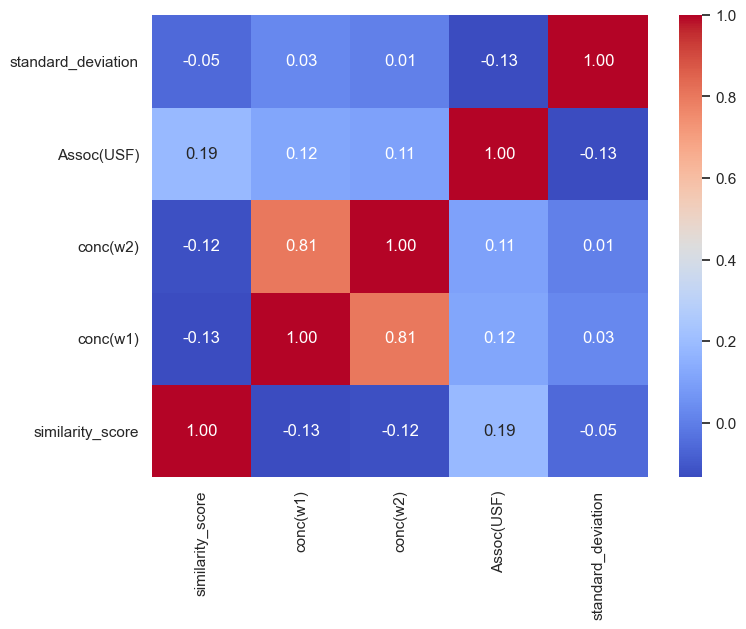

In [755]:
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_eng_simlex, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Matrix of SimLex (ENG)")
plt.gca().invert_yaxis() # Reverse the y-axis
plt.show()

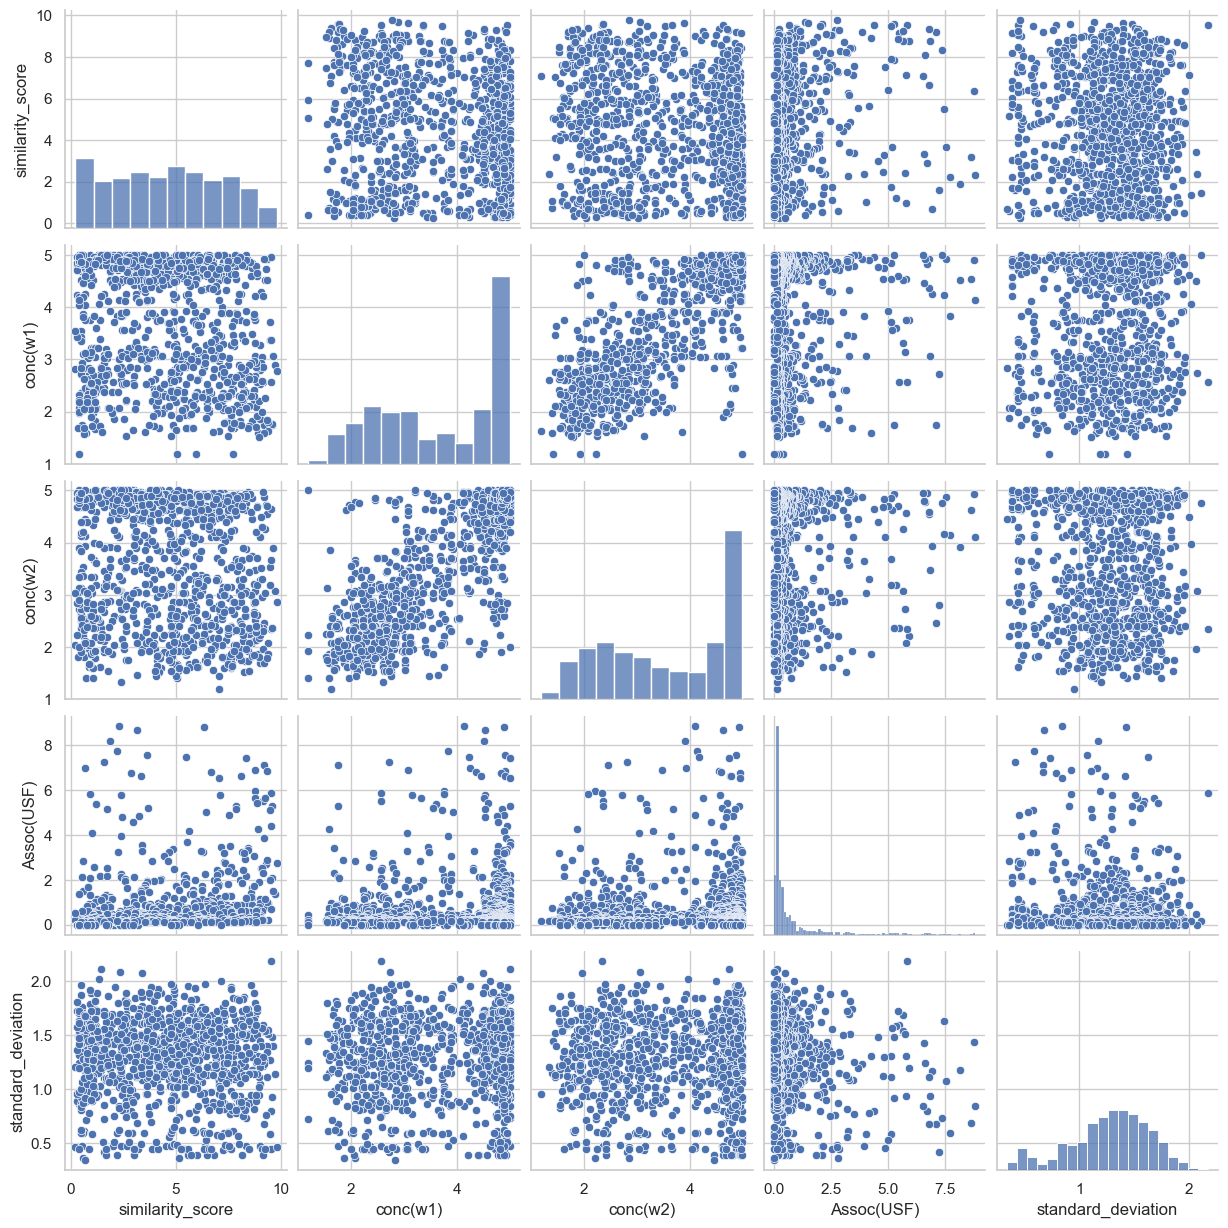

In [756]:
# Pairplot to plot the overview of scatterplots
sns.pairplot(subset_eng_simlex)
plt.show()

##### **3.7.2. Individual Correlations**

##### **Similarity vs Association**

The following correlation can help understand the relationship between conceptual similarity (as judged by human annotators) and associative strength (as indicated by association norms). A strong positive correlation might indicate that word pairs that are rated similarly tend to also be more strongly associated according to USF data.

In [757]:
# Correlation between SimLex-999 similarity score and Assoc(USF) association scores
print_correlation_and_pvalue(eng_simlex, 'similarity_score', 'Assoc(USF)')

Correlation between similarity_score and Assoc(USF): 0.18875
P-value: 1.8268817773562045e-09
The correlation is statistically significant.



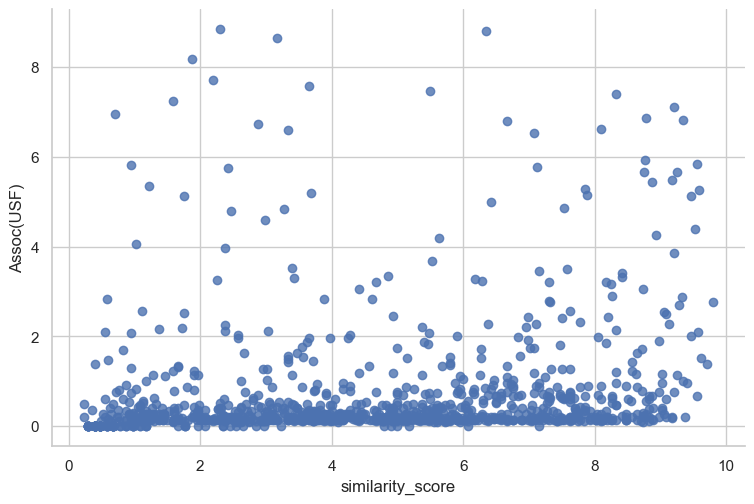

In [758]:
# Plot correlation between SimLex-999 similarity score and Assoc(USF)
plot_correlation(eng_simlex, 'similarity_score', 'Assoc(USF)')

##### **Similarity vs Concreteness**

This correlation might show if more concrete words tend to have higher similarity scores. In other words, if the concreteness of the first/second word in a pair increases, does the perceived similarity between the words increase as well?

In [759]:
# Correlation between SimLex-999 similarity score and concreteness w1
print_correlation_and_pvalue(eng_simlex, 'similarity_score','conc(w1)')

# Correlation between SimLex-999 similarity score and concreteness w2
print_correlation_and_pvalue(eng_simlex, 'similarity_score', 'conc(w2)')

Correlation between similarity_score and conc(w1): -0.12924
P-value: 4.188159650015106e-05
The correlation is statistically significant.

Correlation between similarity_score and conc(w2): -0.11997
P-value: 0.00014426924175285242
The correlation is statistically significant.



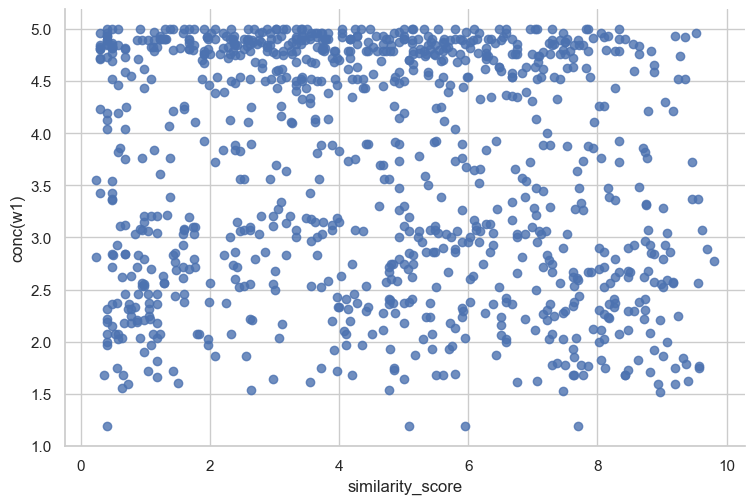

In [760]:
# Plot correlation between SimLex-999 similarity score and concreteness w1
plot_correlation(eng_simlex, 'similarity_score', 'conc(w1)')

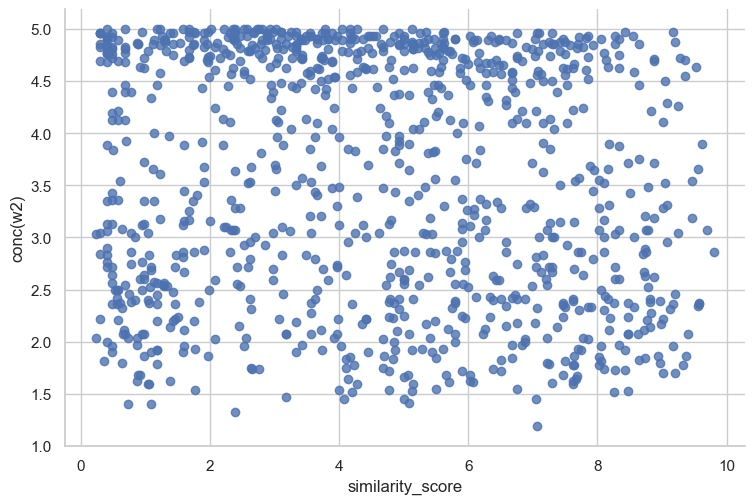

In [761]:
# Plot correlation between similarity score and concreteness w2
plot_correlation(eng_simlex, 'similarity_score', 'conc(w2)')

##### **Similarity vs Standard Deviation**

Lastly, this correlation could indicate whether word pairs with higher variability in perceived similarity tend to have higher or lower average similarity scores.

In [762]:
# Correlation between SimLex-999 and standard deviation
print_correlation_and_pvalue(eng_simlex, 'similarity_score', 'standard_deviation')

Correlation between similarity_score and standard_deviation: -0.05413
P-value: 0.08725330779410836
The correlation is not statistically significant.



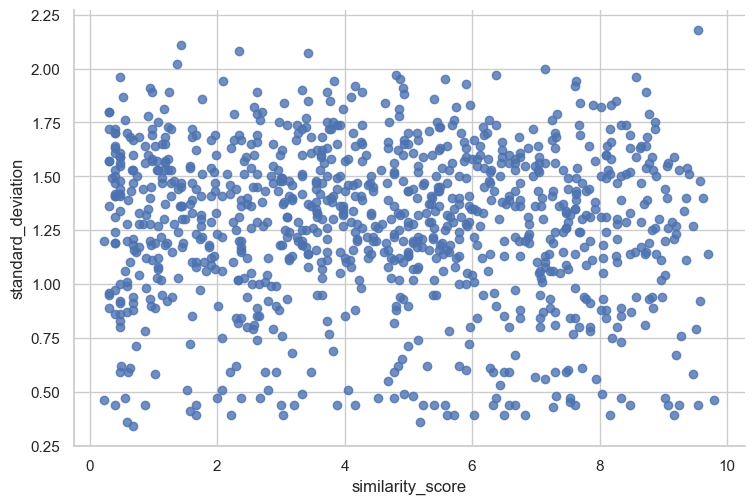

In [763]:

# Plot correlation between similarity score and standard deviation
plot_correlation(eng_simlex, 'similarity_score', 'standard_deviation')

##### **Concreteness vs Association**

In [765]:
# Correlation between concreteness w1 and association
print_correlation_and_pvalue(eng_simlex, 'conc(w1)', 'Assoc(USF)')

Correlation between conc(w1) and Assoc(USF): 0.11882
P-value: 0.00016715993622586566
The correlation is statistically significant.



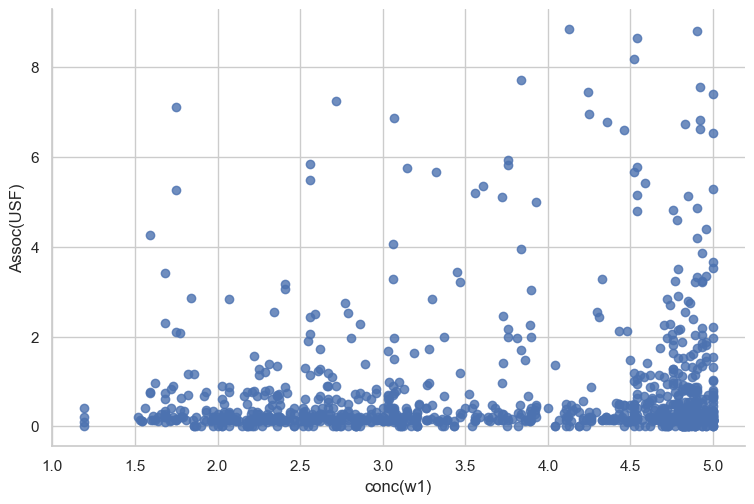

In [766]:

# Plot correlation between concreteness w2 and association
plot_correlation(eng_simlex, 'conc(w1)', 'Assoc(USF)')

In [767]:
# Correlation between concreteness and association
print_correlation_and_pvalue(eng_simlex, 'conc(w2)', 'Assoc(USF)')

Correlation between conc(w2) and Assoc(USF): 0.10608
P-value: 0.0007844280290287479
The correlation is statistically significant.



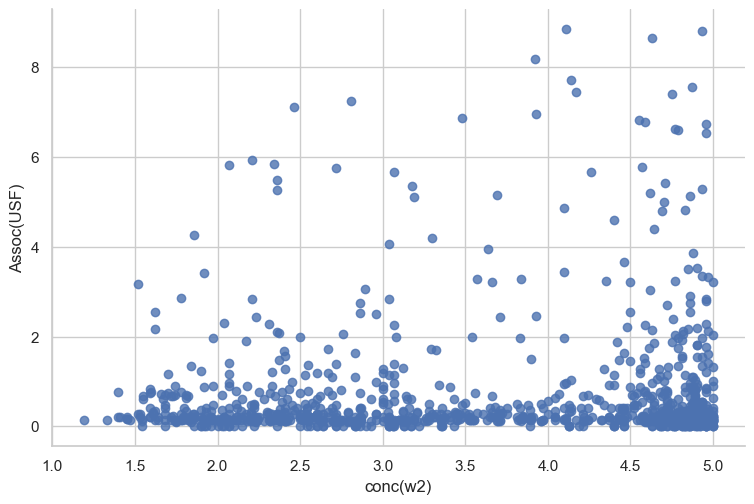

In [768]:

# Plot correlation between concreteness and association
plot_correlation(eng_simlex, 'conc(w2)', 'Assoc(USF)')

##### **Concreteness vs Standard Deviation**

In [769]:
# Correlation between concreteness and standard deviation
print_correlation_and_pvalue(eng_simlex, 'conc(w1)', 'standard_deviation')

Correlation between conc(w1) and standard_deviation: 0.02812
P-value: 0.3746043812080904
The correlation is not statistically significant.



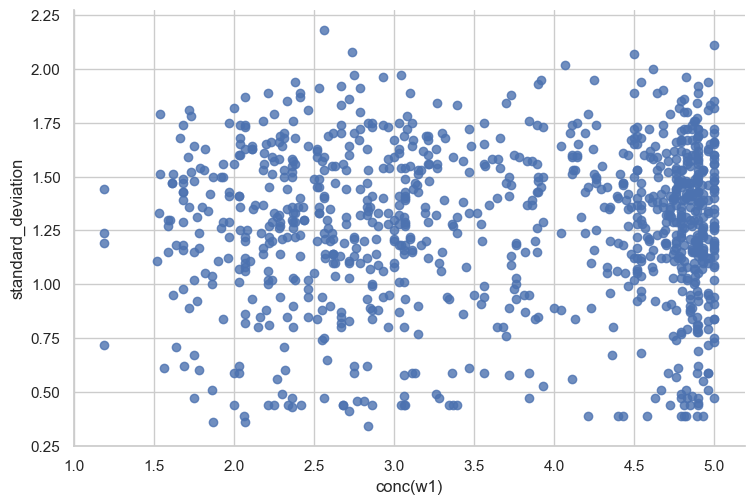

In [770]:

# Plot correlation between concreteness and standard deviation
plot_correlation(eng_simlex, 'conc(w1)', 'standard_deviation')

In [771]:
# Correlation between concreteness and standard deviation
print_correlation_and_pvalue(eng_simlex, 'conc(w2)', 'standard_deviation')

Correlation between conc(w2) and standard_deviation: 0.00501
P-value: 0.8743208935326142
The correlation is not statistically significant.



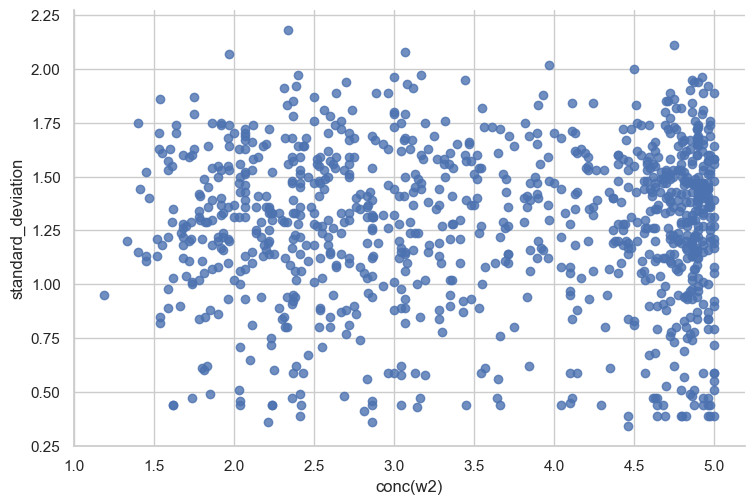

In [772]:

# Plot correlation between concreteness and standard deviation
plot_correlation(eng_simlex, 'conc(w2)', 'standard_deviation')

##### **Association vs Standard Deviation**

In [773]:
# Correlation between association and standard deviation
print_correlation_and_pvalue(eng_simlex, 'Assoc(USF)', 'standard_deviation')

Correlation between Assoc(USF) and standard_deviation: -0.13227
P-value: 2.7430181587107337e-05
The correlation is statistically significant.



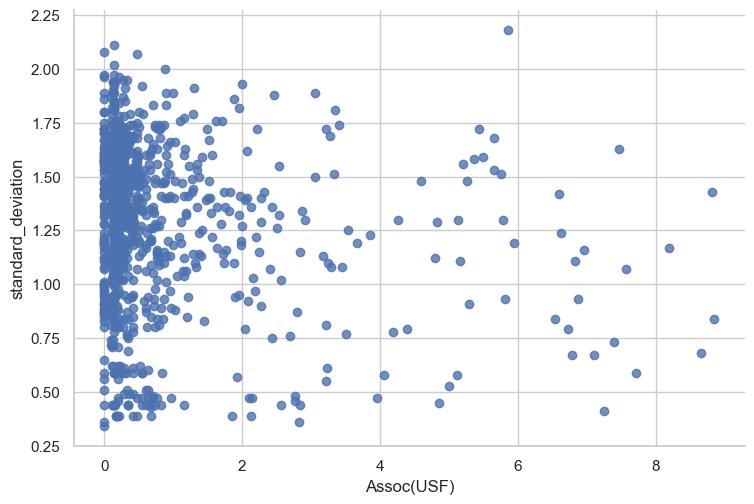

In [774]:

# Correlation between association and standard deviation
plot_correlation(eng_simlex, 'Assoc(USF)', 'standard_deviation')

##### **3.7.2. Interpretation of Results**

The correlations between the English SimLex-999 similarity score and 'Assoc(USF)', 'conc(w1)', 'conc(w2)' are all statistically significant. However, these correlations are relatively weak and only suggest slight tendencies. Furthermore, there is no statistical significant correlation between the similarity score and its standard deviation. This indicates that the variability in similarity ratings does not consistently decrease or increase with the similarity scores. Similarly, the correlations between the other variables are either weak or not significant.